In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [103]:
titanic = pd.read_csv('titanic.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
#Dropping the columns that are not important: PassengerID, Name, Ticket, Cabin and Embarked
cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"] #
titanic = titanic.loc[:,cols]  #Note: .loc is used to access rows and columns by labels (names).
                               #Syntax: df.loc[row_label, column_label]

In [105]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [106]:
titanic.isnull().sum() # Checking for 'Null' values
                       # As seen the 'Age' column has null values. since the column is important we cannot drop it.
                       # plotting Histogram shows data is somewhat normally distributed with 'Mean' value near 0
                       # Thus, we can fill the missing values in the 'Age' column with Mean value
                       # Had 'Age' column data skewness been around 1, we would have used 'Median' value to fill the missing values.

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

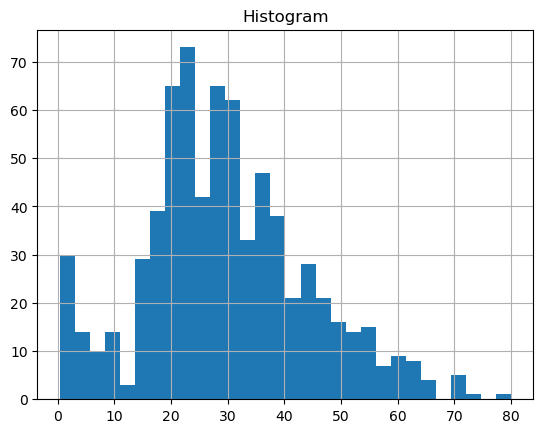

In [107]:
titanic['Age'].hist(bins=30)
plt.title("Histogram")
plt.show()

In [108]:
titanic['Age'].skew()

0.38910778230082704

In [109]:
mean_age = titanic['Age'].mean()

In [110]:
mean_age

29.69911764705882

In [111]:
titanic['Age'] = titanic['Age'].fillna(mean_age)

In [112]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
le= LabelEncoder()

In [115]:
titanic['Sex'] = le.fit_transform(titanic['Sex'])

In [116]:
#titanic.drop(columns = 'male', inplace=True)

In [117]:
# Gender = pd.get_dummies(titanic['Sex'], drop_first = True)

In [118]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [119]:
x = titanic.drop(columns = 'Survived')

In [120]:
y = titanic['Survived']

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [123]:
from tensorflow.keras.models import Sequential # allows you to build a linear stack of layers in a neural network — 
                                               # where each layer has exactly one input tensor and one output tensor.
from tensorflow.keras.layers import Dense      #  represents a fully connected (a.k.a. dense) layer in a neural network.
                                               # Every neuron in a Dense layer is connected to all neurons in the previous layer.
from tensorflow.keras.layers import Input      # defines the input shape and type of a model when using the Functional API 
                                               # (type is not needed for Sequential models). eg. (Input(shape = (6,))) means 6 
                                               # features with no type specified.
from tensorflow.keras.optimizers import Adam, Adadelta # Module contains various optimization algorithms. Adam and Adadelta are 
                                                       # two different gradient-based optimization algorithms.they define how 
                                                       # the model learns during training by updating weights based on loss gradients.
from tensorflow.keras.metrics import RootMeanSquaredError

In [124]:
model = Sequential()
model.add(Input(shape = (6,)))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [125]:
model.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['Accuracy'])
# Accuracy is set to default. if you want to change it use 'binary_accuracy' and change the threshold '0.5'

In [126]:
model.fit(x = x_train, y = y_train, epochs = 100, validation_data = (x_test, y_test), batch_size = 32)

Epoch 1/100
19/19 [==============================] - 4s 31ms/step - loss: 24.6101 - Accuracy: 0.6275 - val_loss: 27.1634 - val_Accuracy: 0.5932
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 24.0952 - Accuracy: 0.6275 - val_loss: 26.6057 - val_Accuracy: 0.5932
Epoch 3/100
19/19 [==============================] - 0s 11ms/step - loss: 23.5910 - Accuracy: 0.6275 - val_loss: 26.0282 - val_Accuracy: 0.5932
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 23.0620 - Accuracy: 0.6275 - val_loss: 25.4593 - val_Accuracy: 0.5932
Epoch 5/100
19/19 [==============================] - 0s 12ms/step - loss: 22.5598 - Accuracy: 0.6275 - val_loss: 24.8580 - val_Accuracy: 0.5932
Epoch 6/100
19/19 [==============================] - 0s 9ms/step - loss: 22.0067 - Accuracy: 0.6275 - val_loss: 24.3038 - val_Accuracy: 0.5932
Epoch 7/100
19/19 [==============================] - 0s 9ms/step - loss: 21.4967 - Accuracy: 0.6275 - val_loss: 23.7143 - val_Accuracy: 0.

In [127]:
model.history.history

{'loss': [24.61006736755371,
  24.095230102539062,
  23.591035842895508,
  23.06195068359375,
  22.55982208251953,
  22.0067195892334,
  21.496742248535156,
  20.975313186645508,
  20.445640563964844,
  19.921356201171875,
  19.403499603271484,
  18.866771697998047,
  18.360132217407227,
  17.8193416595459,
  17.295862197875977,
  16.770965576171875,
  16.240455627441406,
  15.72093391418457,
  15.196207046508789,
  14.682295799255371,
  14.138407707214355,
  13.613058090209961,
  13.077432632446289,
  12.559663772583008,
  12.022439002990723,
  11.507159233093262,
  10.980402946472168,
  10.460229873657227,
  9.933917999267578,
  9.397794723510742,
  8.887636184692383,
  8.337284088134766,
  7.829390048980713,
  7.30620002746582,
  6.792348384857178,
  6.264018535614014,
  5.772988319396973,
  5.256645679473877,
  4.796975612640381,
  4.341185092926025,
  3.926255702972412,
  3.543590545654297,
  3.213963508605957,
  2.9377987384796143,
  2.706444025039673,
  2.4831902980804443,
  2.3

In [128]:
model.history.history.keys() # returns a list (or dict_keys object) of all the metric and loss names that were tracked 
                             # during training using model.fit().

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

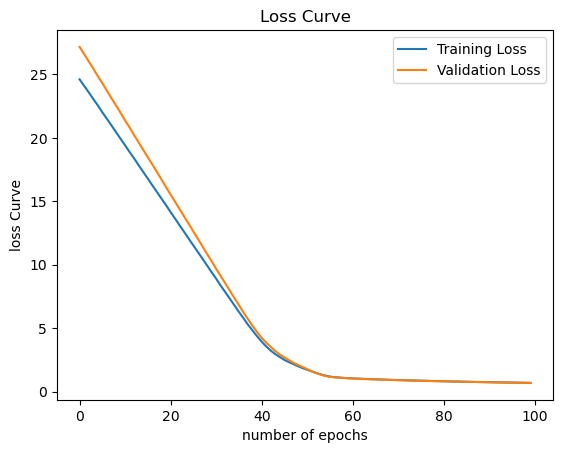

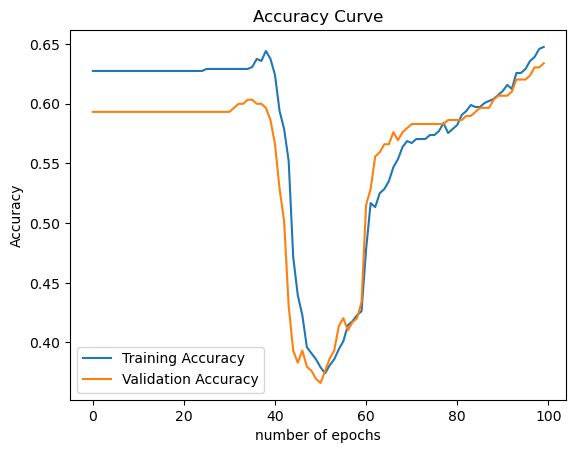

In [129]:
train_loss = model.history.history['loss']
validation_loss = model.history.history['val_loss']
train_accuracy = model.history.history['Accuracy']
validation_accuracy = model.history.history['val_Accuracy']

plt.plot(train_loss, label = 'Training Loss')
plt.plot(validation_loss, label = 'Validation Loss')
plt.xlabel('number of epochs')
plt.ylabel('loss Curve')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.plot(train_accuracy, label = 'Training Accuracy')
plt.plot(validation_accuracy, label = 'Validation Accuracy')
plt.xlabel('number of epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()